In [2]:
import os
import numpy as np
from tqdm import tqdm_notebook as tqdm
from skimage import img_as_float32
from skimage.io import imread
from skimage.feature import peak_local_max
from skimage.filters import gaussian
import matplotlib.pyplot as plt

In [3]:
img = img_as_float32(imread('../data/NeuN_cortex.tif', as_gray=True))
img.shape, img.dtype

C:\Users\Justin\Anaconda3\lib\site-packages\skimage\util\dtype.py:130: UserWarning: Possible precision loss when converting from float64 to float32
  .format(dtypeobj_in, dtypeobj_out))


((64, 1024, 1024), dtype('float32'))

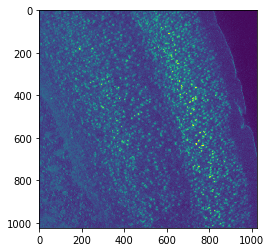

In [4]:
plt.imshow(img[32])
plt.show()

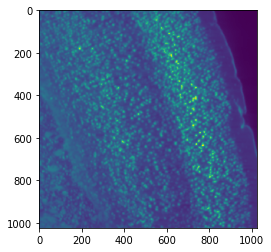

In [5]:
g = gaussian(img, sigma=(1.0, 3.0, 3.0))

plt.imshow(g[32])
plt.show()

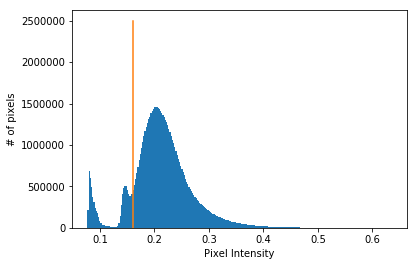

In [6]:
T = 0.16

plt.hist(g.ravel(), bins=256)
plt.plot([T, T], [0, 2500000])
plt.xlabel('Pixel Intensity')
plt.ylabel('# of pixels')
plt.show()

In [7]:
points = peak_local_max(g, min_distance=2, threshold_abs=T)
points.shape

(12749, 3)

In [8]:
zproj = img.max(axis=0)
zproj.shape

(1024, 1024)

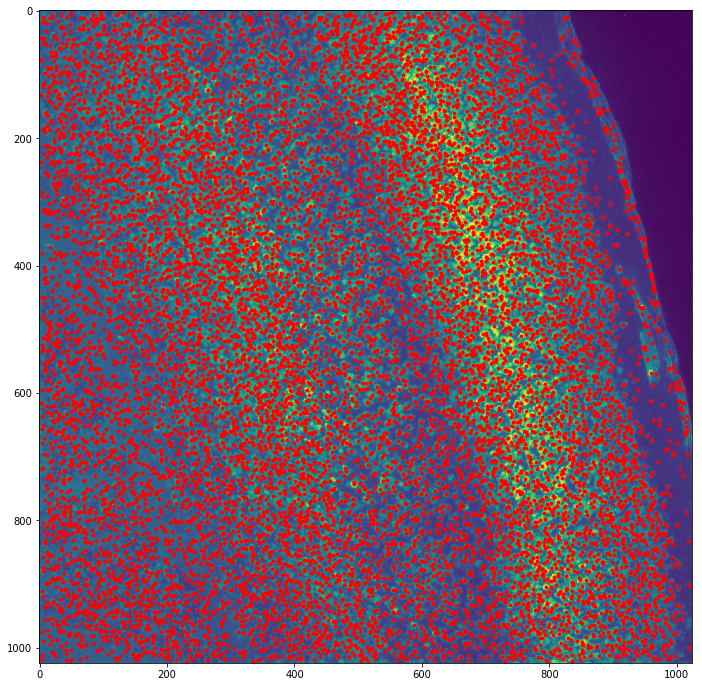

In [9]:
plt.figure(figsize=(12, 12))
plt.imshow(zproj)
plt.plot(points[:, 2], points[:, 1], 'r.')
plt.show()

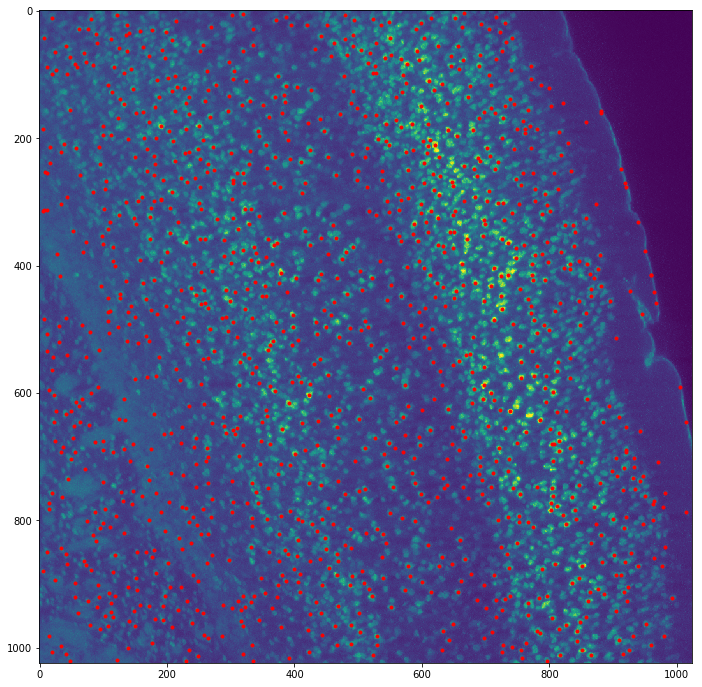

In [10]:
start = 32
stop = 38

idx = np.where(np.logical_and(points[:, 0] >= start, points[:, 0] < stop))[0]
points_inside = points[idx]
zproj = img[start:stop].max(axis=0)

plt.figure(figsize=(12, 12))
plt.imshow(zproj)
plt.plot(points_inside[:, 2], points_inside[:, 1], 'r.')
plt.show()

In [11]:
patch_size = np.asarray((15, 21, 21))

patches = [] 
for i, point in tqdm(enumerate(points), total = len(points)):
    start = np.asarray(point) - patch_size // 2
    stop = start + patch_size
    patch = img[start[0]:stop[0], start[1]:stop[1], start[2]:stop[2]]
    if patch.shape == tuple(patch_size):
        patches.append(patch)
patches = np.asarray(patches)
patches.shape

Widget Javascript not detected.  It may not be installed or enabled properly.


(10476, 15, 21, 21)

In [12]:
zprojs = patches.max(axis=1)

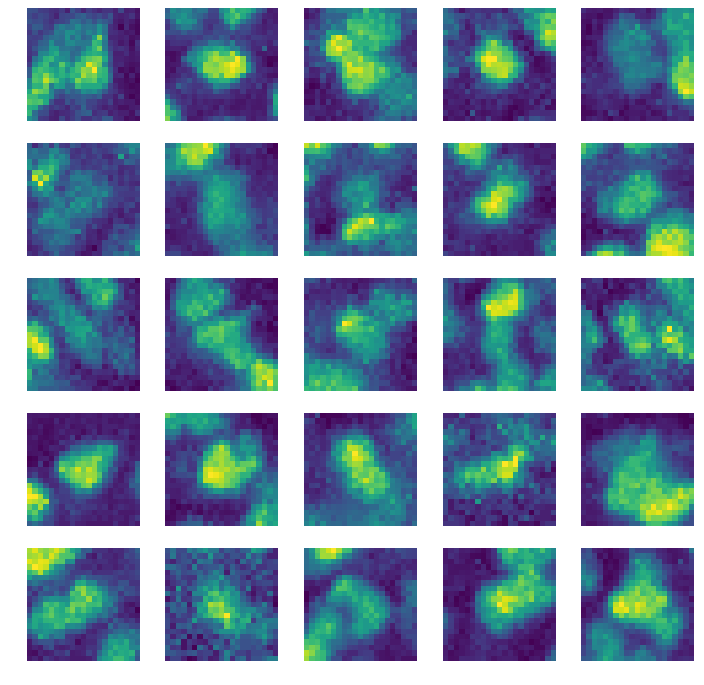

In [13]:
n = 5

idx = np.arange(len(zprojs))
np.random.shuffle(idx)
idx = idx[:n**2]

plt.figure(figsize=(12, 12))
for s, i in enumerate(idx):
    plt.subplot(n, n, s+1)
    plt.imshow(zprojs[i])
    plt.axis('off')
plt.show()

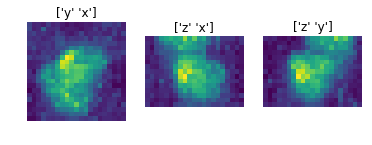

In [14]:
p = patches[2]
axes_names = np.asarray(['z', 'y', 'x'])

for d in range(p.ndim):
    maxproj = p.max(axis=d)
    plt.subplot(1, p.ndim, d+1)
    plt.imshow(maxproj)
    plt.axis('off')
    kept_idx = np.setdiff1d(np.arange(p.ndim), d)
    kept_axes = axes_names[np.asarray(kept_idx)]
    plt.title(str(kept_axes))
plt.show()

In [15]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

In [17]:
x = patches.reshape(len(patches), -1)

In [18]:
pca = PCA(256).fit(x)
sum(pca.explained_variance_ratio_)

0.9278962109920097

In [21]:
x_pca = pca.transform(x)
x_pca.shape

(10476, 256)

In [22]:
x_tsne = TSNE(2).fit_transform(x_pca)
x_tsne.shape

(10476, 2)

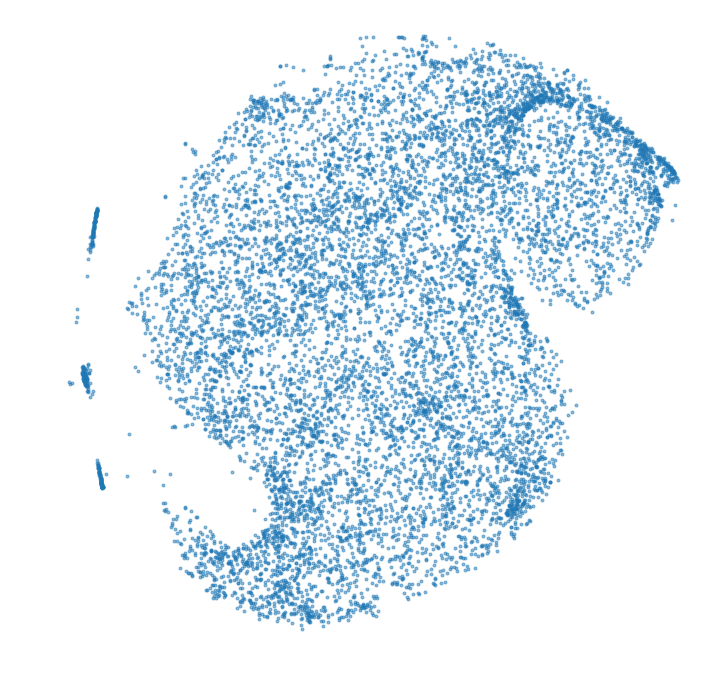

In [26]:
plt.figure(figsize=(12, 12))
plt.plot(x_tsne[:, 0], x_tsne[:, 1], '.', alpha=0.5)
plt.axis('off')
plt.show()